# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
# Used for styling of graphs
!pip install SciencePlots

import scienceplots
plt.style.use(['science', 'grid', 'no-latex'])

# Creating Model Function

In [ ]:
xData = np.array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
yData = np.array([98, 173, 279, 422, 588, 716, 854, 907, 1139, 1364, 1637, 2074, 2767, 3397])
xData -= np.min(xData)

In [ ]:
def logistic(xData, k, x0):
  return L / (1 + np.exp(-k * (xData - x0)))

L = 100000

# Creates a regression model given x and y data
def createModel(xData, yData):
  popt, pcov = curve_fit(logistic, xData, yData,
                        bounds=([0, -np.inf], [np.inf, np.inf]))

  return lambda xData: logistic(xData, *popt)

model = createModel(xData, yData)

# Applying the Noise

In [1]:
NOISE_PERCENTAGE = 5
PERCENTILE = 95

# Applies noise to the input data
def applyNoise(data):
  return data * np.random.normal(loc=1, scale=NOISE_PERCENTAGE / 100, size=np.shape(data))

xPlot = np.linspace(0, 20, 100)
yPlots = []

# Creates 1000 models with noisy input data and finds their predictions
for _ in range(1000):
  tempModel = createModel(xData, applyNoise(yData))
  yPlots.append(tempModel(xPlot))

yPlots = np.array(yPlots)

# Calculates the upper and lower percentiles for predictions
yUpper = np.percentile(yPlots, 50 + PERCENTILE / 2, axis=0)
yLower = np.percentile(yPlots, 50 - PERCENTILE / 2, axis=0)

NameError: name 'np' is not defined

# Plotting the results

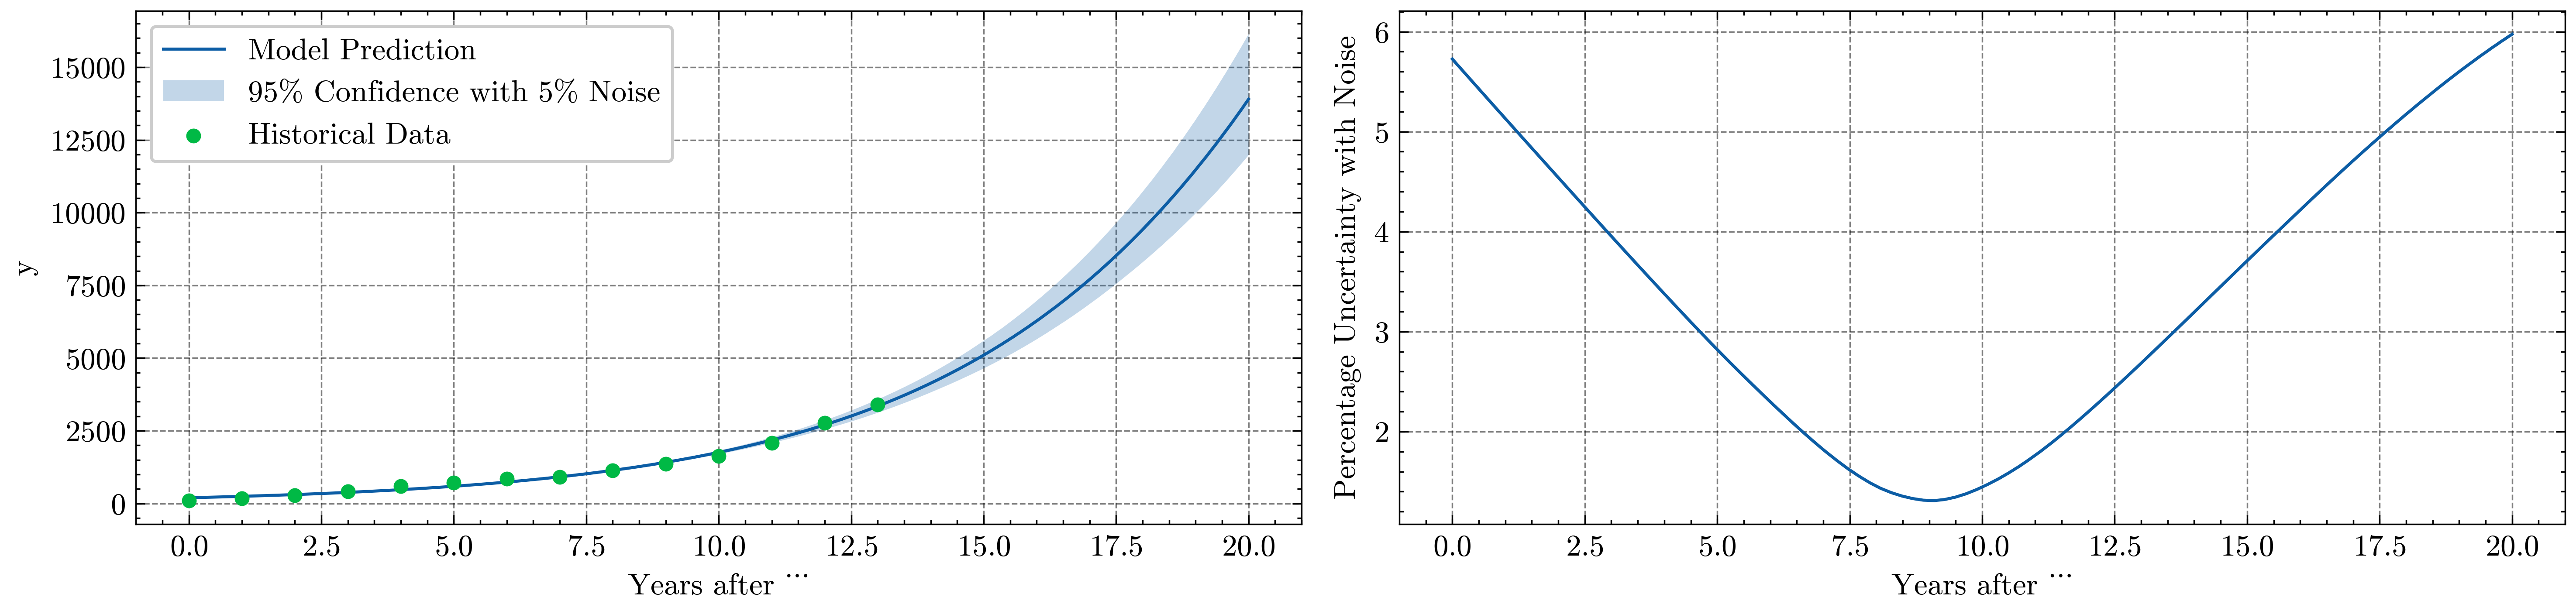

In [ ]:
# Retrieves the first order indicies
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=500)

# Plots the regression
axes[0].plot(xPlot, model(xPlot), label="Model Prediction")

# Plots the confidence interval for the percentile level
axes[0].fill_between(xPlot, yUpper, yLower,
                 alpha=0.25,
                 label=f"{PERCENTILE}% Confidence with {NOISE_PERCENTAGE}% Noise")

axes[0].scatter(xData, yData, marker="o", s=15, label="Historical Data", zorder=2)

axes[0].set_xlabel("Years after ___")
axes[0].set_ylabel("y")
axes[0].legend()


# Plots the percentage uncertainty with the noise
yPrediction = model(xPlot)
axes[1].plot(xPlot, (np.abs(yPlots - yPrediction) / yPrediction).mean(axis=0) * 100)
axes[1].set_xlabel("Years after ___")
axes[1].set_ylabel("Percentage Uncertainty with Noise")

fig.tight_layout()
plt.show()